In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import geopandas as gpd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
#from sklearn.impute import SimpleImputer
import seaborn as sn
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram

from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from imblearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn import preprocessing 

from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, SVMSMOTE

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
austin_msa_2015_2019 = pd.read_csv("Cleaned_Data_Austin_MSA_Census_Tracts_2015_2019.csv")
# austin_msa_2015_2019 = austin_msa_2015_2019.drop(["FIPS", "Qualifying Name"], axis = 1)
austin_msa_2015_2019 = austin_msa_2015_2019[["Percent Point Change Population 25 and Over with at Least Bachelors from 2000", "Percent Point Change Owner Occupied Units from 2000", "Percent Point Change White Population from 2000", "Percent Change Median Family Income from 2000", "Percent Change Median Home Value from 2000", "Percent Change Median Rent from 2000"]]
austin_msa_2015_2019.head()

Percent Point Change Population 25 and Over with at Least Bachelors from 2000  \
0                                           0.011348                               
1                                          -0.019844                               
2                                           0.146632                               
3                                           0.004685                               
4                                          -0.052896                               

   Percent Point Change Owner Occupied Units from 2000  \
0                                          -0.042235     
1                                          -0.167854     
2                                          -0.021091     
3                                          -0.052308     
4                                          -0.045360     

   Percent Point Change White Population from 2000  \
0                                        -0.128412   
1                                        -0.136115   
2                                        -0.138000   
3                                         0.071326   
4                                        -0.282968   

   Percent Change Median Family Income from 2000  \
0                                       0.722512   
1                                       0.504150   
2                                       0.606624   
3                                       0.520114   
4                                       0.141476   

   Percent Change Median Home Value from 2000  \
0                                    0.643771   
1                                    1.064352   
2                                    0.812074   
3                                    0.878739   
4                                    0.544677   

   Percent Change Median Rent from 2000  
0                              1.030418  
1                              0.807635  
2                              1.371469  
3                              0.469497  
4                              0.704359

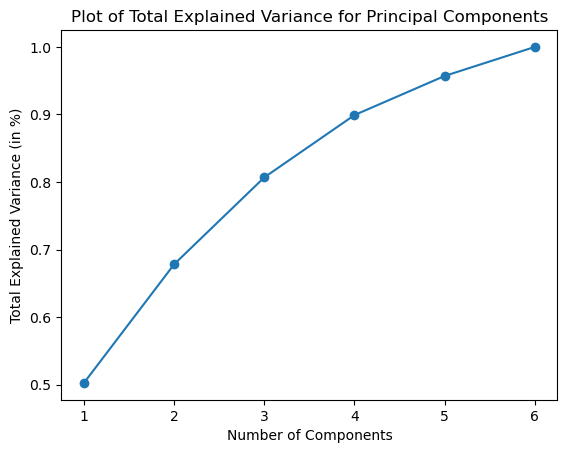

In [4]:
standard = StandardScaler()
min_max = MinMaxScaler()


pca = PCA()

standard_austin_msa_2015_2019 = standard.fit_transform(austin_msa_2015_2019)
min_max_austin_msa_2015_2019 = min_max.fit_transform(austin_msa_2015_2019)


pca.fit_transform(standard_austin_msa_2015_2019)

n_components = list(range(1, standard_austin_msa_2015_2019.shape[-1] + 1))
total_explained_variance = [sum(PCA(n_components = x).fit(standard_austin_msa_2015_2019).explained_variance_ratio_) for x in range (1, standard_austin_msa_2015_2019.shape[-1] + 1)]

plt.plot(n_components, total_explained_variance, marker = 'o')

plt.title('Plot of Total Explained Variance for Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Total Explained Variance (in %)')

plt.xticks(range(1, standard_austin_msa_2015_2019.shape[-1] + 1))

plt.show()

In [5]:
# transformed_austin_msa_2015_2019 = PCA(n_components = 2).fit_transform(standard_austin_msa_2015_2019)

In [6]:
def visualize_clusters(features, labels, cluster_type):
 #   fig,ax = plt.subplots(1)

    plt.tick_params(left = False, right = False , labelleft = False , labelbottom = False, bottom = False) 
    if features.shape[-1] > 2:
        pca = PCA(n_components = 2)
        features = pca.fit_transform(features)
    plt.title(cluster_type + " Cluster Visualization")
#     ax.set_yticklabels([])
#     ax.set_xticklabels([])
    plt.scatter(features[:, 0], features[:, 1], c = labels)

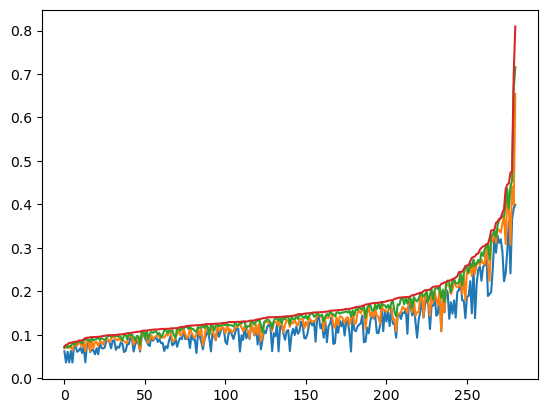

In [7]:

nearest_neighbors = NearestNeighbors(n_neighbors = 4)
clf = nearest_neighbors.fit(min_max_austin_msa_2015_2019)
distances, x = clf.kneighbors()
for distance in distances:
    distance = sorted(distance, key = float)
distances = sorted(distances, key = lambda x:x[3])
plt.plot(distances)    
plt.show()

In [8]:
proximity_matrix = pdist(standard_austin_msa_2015_2019)

single = hierarchy.single(standard_austin_msa_2015_2019)
single_cophenet = cophenet(single, proximity_matrix)
print("single: CPCC =", single_cophenet[0])
complete = hierarchy.complete(standard_austin_msa_2015_2019)
complete_cophenet = cophenet(complete, proximity_matrix)
print("complete: CPCC =", complete_cophenet[0])
average = hierarchy.average(standard_austin_msa_2015_2019)
average_cophenet = cophenet(average, proximity_matrix)
print("average: CPCC =", average_cophenet[0])
weighted = hierarchy.weighted(standard_austin_msa_2015_2019)
weighted_cophenet = cophenet(weighted, proximity_matrix)
print("weighted: CPCC = ", weighted_cophenet[0])
centroid = hierarchy.centroid(standard_austin_msa_2015_2019)
centroid_cophenet = cophenet(centroid, proximity_matrix)
print("centroid: CPCC = ", centroid_cophenet[0])
median = hierarchy.weighted(standard_austin_msa_2015_2019)
median_cophenet = cophenet(median, proximity_matrix)
print("median: CPCC = ", median_cophenet[0])
ward = hierarchy.weighted(standard_austin_msa_2015_2019)
ward_cophenet = cophenet(ward, proximity_matrix)
print("ward: CPCC = ", ward_cophenet[0])

single: CPCC = 0.8226459038126119
complete: CPCC = 0.47718003890020827
average: CPCC = 0.8493803528369807
weighted: CPCC =  0.6296630958635107
centroid: CPCC =  0.8436739440245372
median: CPCC =  0.6296630958635107
ward: CPCC =  0.6296630958635107


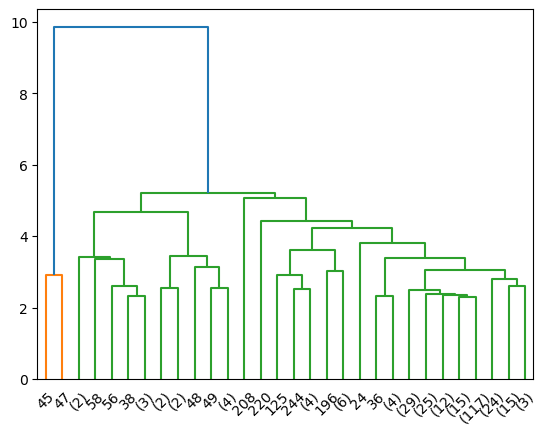

In [9]:
temp = hierarchy.linkage(standard_austin_msa_2015_2019, "average")
plt.figure()
dn = hierarchy.dendrogram(temp, truncate_mode = "lastp")

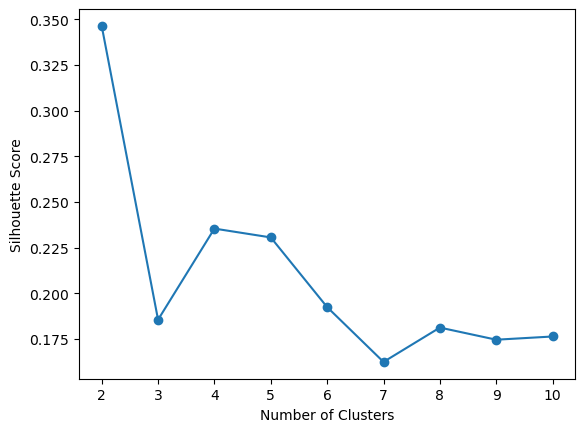

In [10]:
silhouette = []
for k in range(2,11):
    clf = KMeans(n_init = 'auto', n_clusters = k, random_state = 1)
    predictions = clf.fit_predict(min_max_austin_msa_2015_2019)
    predictions = pd.Series(predictions)
    silhouette.append(silhouette_score(min_max_austin_msa_2015_2019, predictions))
plt.plot(range(2, 11), silhouette, marker = 'o')
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

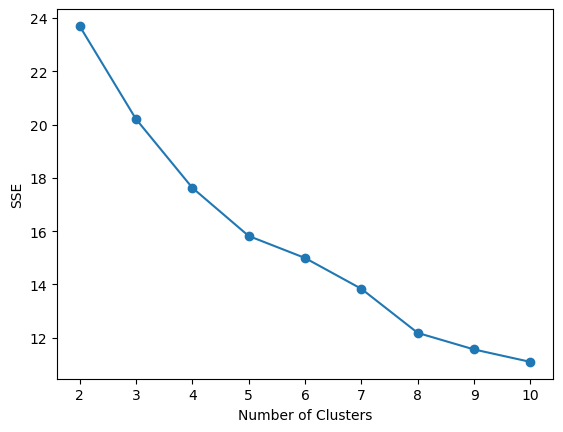

In [11]:
sse = []
for k in range(2, 11):
    kmeans = KMeans(n_init = 'auto', n_clusters=k, random_state = 1)
    kmeans.fit(min_max_austin_msa_2015_2019)
    sse.append(kmeans.inertia_) # cohesion

#visualize results
plt.plot(range(2, 11), sse, marker = 'o')
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

This clustering had a silhouette score of 0.2305916630545221


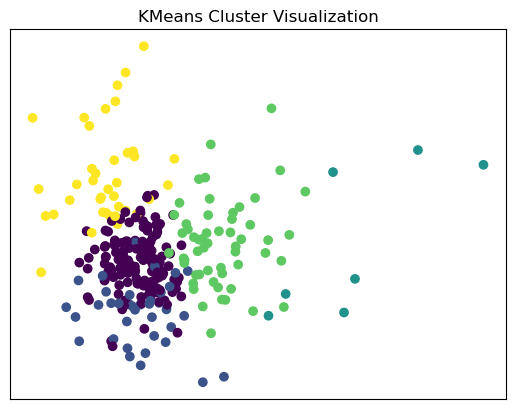

In [12]:
labels_kmeans = KMeans(n_init = 'auto', random_state = 1, n_clusters = 5).fit_predict(min_max_austin_msa_2015_2019)
if len(np.unique(labels_kmeans)) >= 2:
     print("This clustering had a silhouette score of", silhouette_score(min_max_austin_msa_2015_2019, labels_kmeans))
else: 
    print("No Clusters Found")
visualize_clusters(standard_austin_msa_2015_2019, labels_kmeans, "KMeans")

In [13]:
labels_DBSCAN = DBSCAN(eps = 0.2, min_samples = 4).fit_predict(min_max_austin_msa_2015_2019)
if len(np.unique(labels_DBSCAN)) >= 2:
    print("This clustering had a silhouette score of", silhouette_score(min_max_austin_msa_2015_2019, labels_DBSCAN))
    print("NOTE: DBSCAN Tends towards lower silhouette scores")
else: 
    print("No Clusters Found")
visualize_clusters(standard_austin_msa_2015_2019, labels_DBSCAN, "DBSCAN")

This clustering had a silhouette score of 0.4078395101258803
NOTE: DBSCAN Tends towards lower silhouette scores


This clustering had a silhouette score of 0.6850758985309026


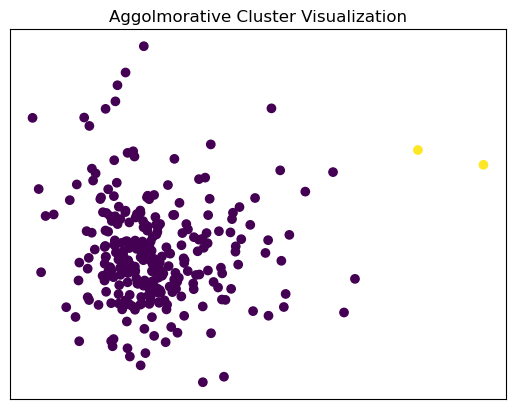

In [14]:
labels_agglomorative_clustering = AgglomerativeClustering(n_clusters = 2, linkage = "average").fit_predict(standard_austin_msa_2015_2019)
if len(np.unique(labels_agglomorative_clustering)) >= 2:
     print("This clustering had a silhouette score of", silhouette_score(standard_austin_msa_2015_2019, labels_agglomorative_clustering))
else: 
    print("No Clusters Found")
visualize_clusters(standard_austin_msa_2015_2019, labels_agglomorative_clustering, "Aggolmorative")

<Axes: title={'center': 'Percent Point Change Owner Occupied Units from 2000'}, xlabel='cluster'>

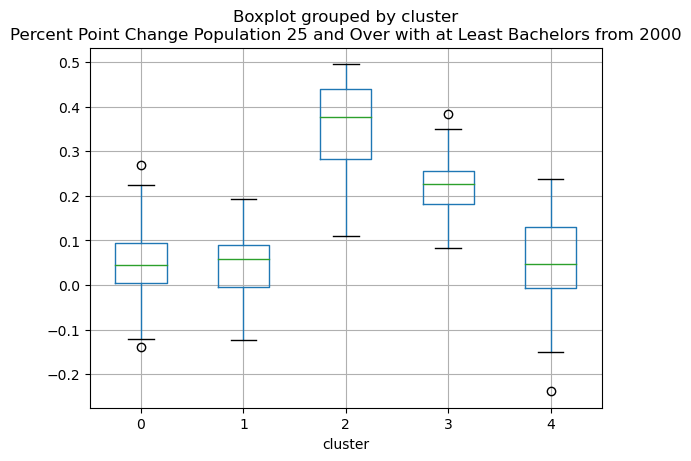

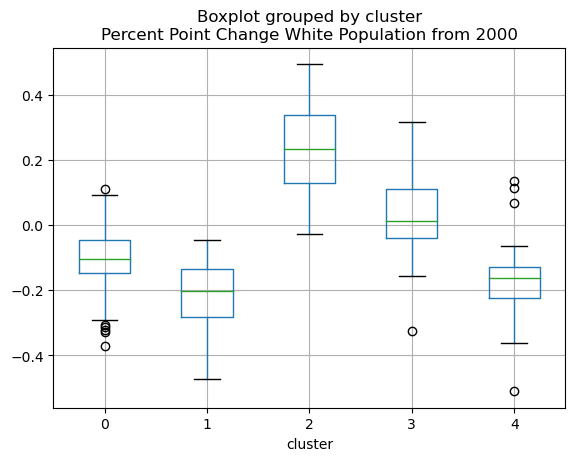

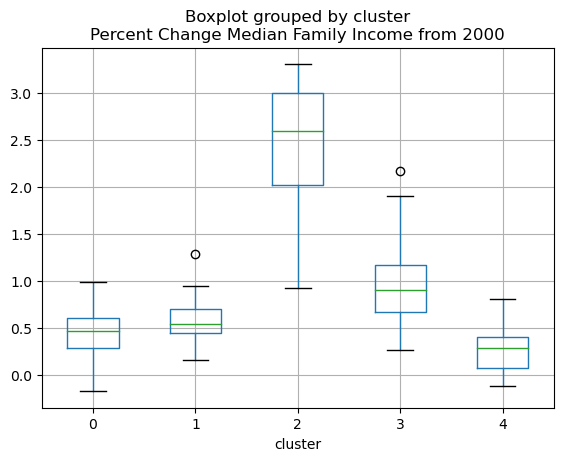

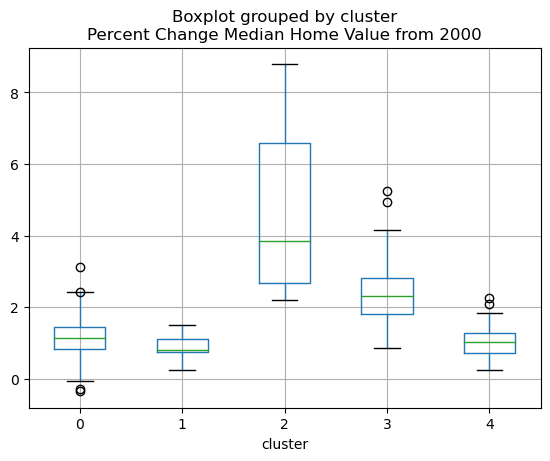

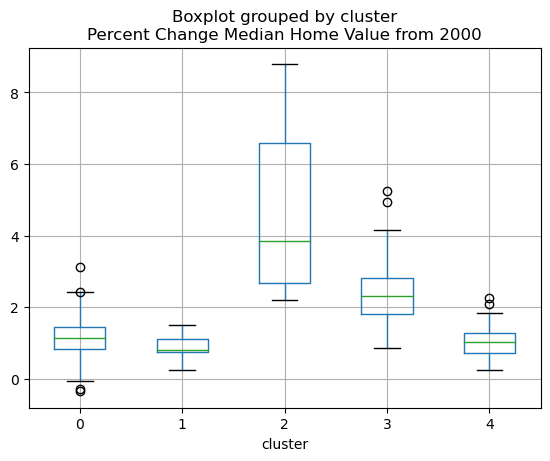

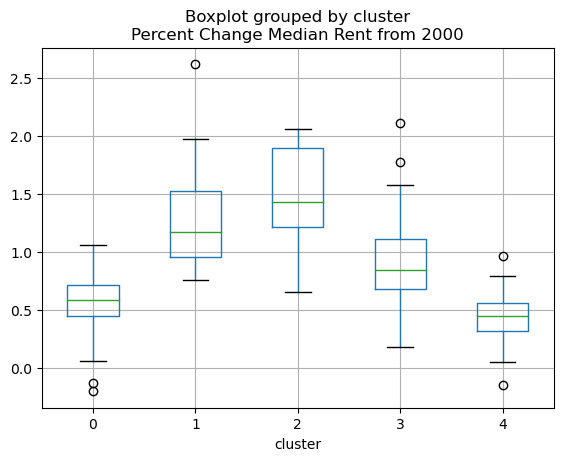

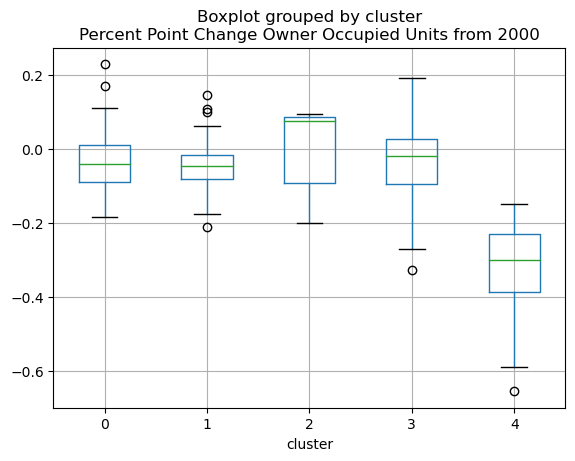

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

test = pd.read_csv("Cleaned_Data_Austin_MSA_Census_Tracts_2015_2019.csv")
test['cluster'] = labels_kmeans

test.boxplot(column = 'Percent Point Change Population 25 and Over with at Least Bachelors from 2000', by = 'cluster')
test.boxplot(column = 'Percent Point Change White Population from 2000', by = 'cluster')
test.boxplot(column = 'Percent Change Median Family Income from 2000', by = 'cluster')
test.boxplot(column = 'Percent Change Median Home Value from 2000', by = 'cluster')
test.boxplot(column = 'Percent Change Median Home Value from 2000', by = 'cluster')
test.boxplot(column = "Percent Change Median Rent from 2000", by = 'cluster')
test.boxplot(column = "Percent Point Change Owner Occupied Units from 2000", by = 'cluster')



In [16]:
def export_clusters(data, clusters, name):
    data["Gentrification"] = clusters
    data.to_csv(name)

In [17]:
export_clusters(pd.read_csv("Cleaned_Data_Austin_MSA_Census_Tracts_2015_2019.csv"), pd.Series(labels_kmeans), "Austin_MSA_Census_Tracts_2015_2019_KMeans.csv")